# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [4]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [5]:
soup = BeautifulSoup(page.text, 'lxml')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [6]:
soup

<!DOCTYPE html>
<html class="no-js bg-fixed" lang="" style="background-image:url(https://nplus1.ru/images/2021/03/13/ef6a77af901d99fbc7f1524bc1f6f818.jpg)">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="black" name="apple-mobile-web-app-status-bar-style"/>
<meta content="7991d7eb02d759f05b9050e111a7e3eb" name="wmail-verification"/>
<link href="https://nplus1.ru" rel="canonical"/>
<title>N+1: научные статьи, новости, открытия</title>
<!-- for Google -->
<meta content="N+1: научные статьи, новости, открытия" name="description"/>
<meta content="" name="author"/>
<meta content="" name="copyright"/>
<!-- for Facebook -->
<meta content="N+1: научные статьи, новости, открытия" property="og:title"/>
<meta content="https://nplus1.ru/i/logo.png" property="og:image"/>
<meta content="https://nplus1.ru" property="og:ur

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js bg-fixed" lang="" style="background-image:url(https://nplus1.ru/images/2021/03/13/ef6a77af901d99fbc7f1524bc1f6f818.jpg)">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="black" name="apple-mobile-web-app-status-bar-style"/>
  <meta content="7991d7eb02d759f05b9050e111a7e3eb" name="wmail-verification"/>
  <link href="https://nplus1.ru" rel="canonical"/>
  <title>
   N+1: научные статьи, новости, открытия
  </title>
  <!-- for Google -->
  <meta content="N+1: научные статьи, новости, открытия" name="description"/>
  <meta content="" name="author"/>
  <meta content="" name="copyright"/>
  <!-- for Facebook -->
  <meta content="N+1: научные статьи, новости, открытия" property="og:title"/>
  <meta content="https://nplus1.ru/i/logo.png" property="og:image"/>
  <meta con

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [9]:
for link in soup.find_all('a'):
    print(link.get('href'))

#
/
#
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
/theme/explainatorium
/theme/bookshelf
/theme/Courses
/theme/coronavirus-history
/
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
#
/theme/explainatorium
/theme/bookshelf
/theme/Courses
/theme/coronavirus-history
https://nplus1.ru/blog/2021/03/02/astronomer-Subbotina
https://nplus1.ru/blog/2021/03/02/astronomer-Subbotina
https://nplus1.ru/blog/2021/03/02/march-2021-observations
https://nplus1.ru/blog/2021/03/01/freezing-warming
https://nplus1.ru/blog/2021/02/26/arctic-ice
https://nplus1.ru/blog/2021/02/26/the-undercover-economist
https://nplus1.ru/blog/2021/02/19/schwindsucht
https://nplus1.ru/blog/2021/02/18/what-is-life
https://nplus1.ru/blog/2021/02/17/modern-death
https://nplus1.ru/blog/2021/02/16/the-murder-of-william-of-norwich
https://nplus1.ru/blog/2021/03/04/mesmerism-and-the-end-of-the-enlightenment
/news/2021/03/13/brinc
/news/2021/03/13/pazyryk-carpet
/news/2021/03/13/

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [10]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append(link.get('href'))
urls

['/news/2021/03/13/music-therapy-and-autism',
 '/news/2021/03/13/gvd',
 '/news/2021/03/13/evasive-mimicry',
 '/news/2021/03/12/one-shot-covid',
 '/news/2021/03/12/mice-in-pain',
 '/news/2021/03/12/diophantine-equation',
 '/news/2021/03/12/deepfake',
 '/news/2021/03/12/hirmoneura-messelense',
 '/news/2021/03/12/sky-viper',
 '/news/2021/03/12/virtual-pollination-trade',
 '/news/2021/03/12/hope-mars-science',
 '/news/2021/03/12/carrier',
 '/news/2021/03/12/meteorite-protoplanet',
 '/news/2021/03/12/juicer-warning',
 '/news/2021/03/12/perseverance-supercam-activated',
 '/news/2021/03/12/f-15ex',
 '/news/2021/03/12/led-fabric',
 '/news/2021/03/11/thismia-belumensis',
 '/news/2021/03/11/blue-tits',
 '/news/2021/03/01/mult-reality',
 '/news/2021/03/05/TFQKD',
 '/news/2021/03/10/icecube-glashow',
 '/news/2021/03/05/falco-peregrinus',
 '/news/2021/03/12/diophantine-equation',
 '/news/2021/03/05/physical-warp-drive',
 '/news/2021/03/13/evasive-mimicry',
 '/news/2021/03/01/metalens-focus',
 '/new

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [61]:
full_urls = []

for u in urls:
    res = 'https://nplus1.ru' + u
    full_urls.append(res) 

full_urls

['https://nplus1.ru/news/2021/03/13/music-therapy-and-autism',
 'https://nplus1.ru/news/2021/03/13/gvd',
 'https://nplus1.ru/news/2021/03/13/evasive-mimicry',
 'https://nplus1.ru/news/2021/03/12/one-shot-covid',
 'https://nplus1.ru/news/2021/03/12/mice-in-pain',
 'https://nplus1.ru/news/2021/03/12/diophantine-equation',
 'https://nplus1.ru/news/2021/03/12/deepfake',
 'https://nplus1.ru/news/2021/03/12/hirmoneura-messelense',
 'https://nplus1.ru/news/2021/03/12/sky-viper',
 'https://nplus1.ru/news/2021/03/12/virtual-pollination-trade',
 'https://nplus1.ru/news/2021/03/12/hope-mars-science',
 'https://nplus1.ru/news/2021/03/12/carrier',
 'https://nplus1.ru/news/2021/03/12/meteorite-protoplanet',
 'https://nplus1.ru/news/2021/03/12/juicer-warning',
 'https://nplus1.ru/news/2021/03/12/perseverance-supercam-activated',
 'https://nplus1.ru/news/2021/03/12/f-15ex',
 'https://nplus1.ru/news/2021/03/12/led-fabric',
 'https://nplus1.ru/news/2021/03/11/thismia-belumensis',
 'https://nplus1.ru/new

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [15]:
url0 = full_urls[6]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'lxml')

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [16]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="ie=edge" http-equiv="x-ua-compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="yes" name="apple-mobile-web-app-capable"/>,
 <meta content="black" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="7991d7eb02d759f05b9050e111a7e3eb" name="wmail-verification"/>,
 <meta content="2021-03-12" itemprop="datePublished"/>,
 <meta content="Григорий Копиев" name="mediator_author"/>,
 <meta content="На реальных фотографиях отражения почти идентичны, а на фейковых они отличаются" name="description"/>,
 <meta content="Григорий Копиев" name="author"/>,
 <meta content="" name="copyright"/>,
 <meta content="Отражение в глазах выдало в фотографиях людей дипфейки" property="og:title"/>,
 <meta content="https://nplus1.ru/images/2021/03/12/8ab565f169272caa68c2c15e21ed9f44.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2021/03/12/deepfake" property="og:url"/>,
 <meta content="На реаль

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [17]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Григорий Копиев" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [18]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Григорий Копиев" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [19]:
soup0.find_all('meta', {'name' : 'author'})[0].attrs

{'name': 'author', 'content': 'Григорий Копиев'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [20]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
author

'Григорий Копиев'

Аналогичным образом извлечем дату, заголовок и описание.

In [25]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
description

'На реальных фотографиях отражения почти идентичны, а на фейковых они отличаются'

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [26]:
soup0.find_all('p')

[<p class="table">
 <a data-rubric="it" href="/rubric/it">IT</a>
 </p>,
 <p class="table">
 <a href="/news/2021/03/12">
 <time content="2021-03-12" data-unix="1615559997" itemprop="datePublished">
 <span>17:39</span>
 <span>12 Март 2021</span>
 </time>
 </a>
 </p>,
 <p class="table">
 <a href="/difficult/2.7">
 <span>Сложность</span>
 <span class="difficult-value">2.7</span>
 </a>
 </p>,
 <p class="title"></p>,
 <p class="credits">Shu Hu et al. / arXiv.org, 2020</p>,
 <p>Американские исследователи предложили новый метод, позволяющий отличить дипфейковое изображение от настоящего. Он основан на сравнении отражений в глазах человека: на реальных фотографиях отражения почти идентичны, а в созданных нейросетью они сильно разнятся между глазами. Статья <a href="https://arxiv.org/pdf/2009.11924.pdf" rel="nofollow" target="_blank">опубликована</a> на arXiv.org.</p>,
 <p>В последние несколько лет технологии подмены лиц на фотографиях и создания фотографий несуществующих людей резко продвинулис

Выберем из полученного списка первый элемент и найдем в нем все тэги `<a>`:

In [27]:
soup0.find_all('p')[0].find_all('a')

[<a data-rubric="it" href="/rubric/it">IT</a>]

Получился список из одного элемента. Применим списковые включения – вытащим из каждого элемента (их могло бы быть больше) текст и поместим его в новый список `rubrics`.

In [35]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['IT']

Осталась только сложность. Возьмем соответствующий кусок кода:

In [39]:
soup0.find_all('span', {'class' : 'difficult-value'})

[<span class="difficult-value">2.7</span>]

И выберем оттуда текст.

In [40]:
diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
diff

'2.7'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class`:

In [60]:
text_list = soup0.find_all('p', {'class' : None})

«Выцепим» все тексты (без тэгов) из полученного списка:

In [50]:
text = [t.text for t in text_list]

In [48]:
text=[]
for t in text_list:
    if t.text.startwith('Нашли опечатку'):
        break
    text.appendt(t.text)

AttributeError: 'str' object has no attribute 'startwith'

Склеим все элементы списка `text` через пробел:

In [43]:
final_text = ' '.join(text)
final_text

'Американские исследователи предложили новый метод, позволяющий отличить дипфейковое изображение от\xa0настоящего. Он\xa0основан на\xa0сравнении отражений в\xa0глазах человека: на\xa0реальных фотографиях отражения почти идентичны, а\xa0в\xa0созданных нейросетью они сильно разнятся между глазами. Статья опубликована на\xa0arXiv.org. В\xa0последние несколько лет технологии подмены лиц на\xa0фотографиях и\xa0создания фотографий несуществующих людей резко продвинулись вперед, и\xa0теперь обнаружить такие подделки стало очень сложно как людям, так и\xa0алгоритмам. Качество работы алгоритмов для создания дипфейков выросло настолько сильно, что государствам приходится принимать законы, запрещающие их\xa0применение, а\xa0компаниям\xa0— проводить конкурсы по\xa0созданию защиты от\xa0таких алгоритмов. Во\xa0многом быстрое развитие технологий в\xa0этой области связано с\xa0тем, что оно превратилось в\xa0классическое «противостояние щита и\xa0меча»: одни исследователи разрабатывают методы обнаруже

Все здорово, только мешают отступы-переходы на новую строку `\n`. Заменим их на пробелы с помощью метода `.replace`:

In [51]:
final_text = final_text.replace('\n', ' ')

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [63]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = final_text.replace('\xa0', ' ')
    final_text = final_text.replace('\n', ' ')
    
    return url0, date, author, description, title, final_text, rubrics, diff

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [58]:
from time import sleep

In [64]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in full_urls:
    res = GetNews(link)
    news.append(res)
    sleep(1) # задержка в 3 секунды

Так теперь выглядит первый элемент списка:

In [65]:
news[0]

('https://nplus1.ru/news/2021/03/13/music-therapy-and-autism',
 '2021-03-13',
 'Екатерина Рощина',
 'Занятия музыкой сильнее вовлекали детей в совместную деятельность и увеличивали их подвижность',
 'Ученые объяснили преимущества музыкальной терапии при лечении аутизма',
 'Ученые объяснили эффективность музыкальной терапии по сравнению с игровыми формами вмешательства при лечении детей школьного возраста с аутизмом. Оказалось, что музыкальные вмешательства значительно больше вовлекают детей в нетипичную для данного расстройства совместную деятельность с терапевтом и оставляют меньше времени на столь типичное для этих детей взаимодействие исключительно с объектами, а также способствуют увеличению подвижности детей. Статья опубликована в журнале Neurorehabilitation. На протяжении десятилетий ученые делятся наблюдениями о том, что музыкальная терапия эффективна для улучшения социальной коммуникации и моторики у детей с аутизмом: например, она способствует развитию речи и невербальных навы

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [66]:
import pandas as pd

In [67]:
df = pd.DataFrame(news)

In [68]:
df.head(2)

,0,1,2,3,4,5,6,7
0,https://nplus1.ru/news/2021/03/13/music-therap...,2021-03-13,Екатерина Рощина,Занятия музыкой сильнее вовлекали детей в совм...,Ученые объяснили преимущества музыкальной тера...,Ученые объяснили эффективность музыкальной тер...,"[Психология, Медицина]",3.5
1,https://nplus1.ru/news/2021/03/13/gvd,2021-03-13,Сергей Кузнецов,"Строить установку начали шесть лет назад, а пе...",Нейтринный телескоп на Байкале официально открыт,Официально введен в эксплуатацию российский не...,[Физика],1.2


Переименуем столбцы в базе.

In [71]:
df.columns = ['link', 'date', 'author', 'title', 'desc', 'text', 'rubric', 'diffc']

In [72]:
df.head(2)

,link,date,author,title,desc,text,rubric,diffc
0,https://nplus1.ru/news/2021/03/13/music-therap...,2021-03-13,Екатерина Рощина,Занятия музыкой сильнее вовлекали детей в совм...,Ученые объяснили преимущества музыкальной тера...,Ученые объяснили эффективность музыкальной тер...,"[Психология, Медицина]",3.5
1,https://nplus1.ru/news/2021/03/13/gvd,2021-03-13,Сергей Кузнецов,"Строить установку начали шесть лет назад, а пе...",Нейтринный телескоп на Байкале официально открыт,Официально введен в эксплуатацию российский не...,[Физика],1.2


Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [75]:
df['diffc'] = [float(i) for i in df.diffc]

In [77]:
df.diffc[0]

3.5

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [76]:
df.diffc.describe()

count    28.000000
mean      3.957143
std       1.737267
min       1.200000
25%       2.675000
50%       3.400000
75%       5.100000
max       7.800000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

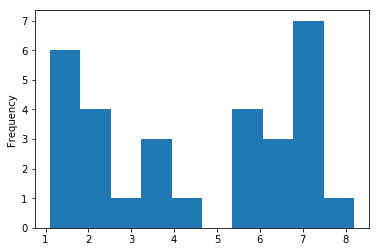

In [36]:
%matplotlib inline
df.diffc.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [37]:
df['rubric'] = [','.join(r) for r in df.rubric]

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [ ]:
df.text[0]

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [38]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [39]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [40]:
df.clean_text[0]

'Российский военно-транспортный самолет Ил-112В совершил первый полет, сообщает Авиационный комплекс имени Ильюшина. Испытания прошли на аэродроме воронежского авиазавода ПАО «ВАСО», командиром экипажа был шеф-пилот ПАО «Ил» Герой России Николай Куимов. Первый полет стал завершением цикла аэродромной отработки, в ходе которой были проведены испытания всех систем, в том числе пробежки по аэродрому. Полет прошел в штатном режиме. В воздухе Ил-112В сопровождал самолет-лаборатория Ил-114ЛЛ. Ил-112В в перспективе должен заменить легкий транспортник Ан-26. Он будет использоваться для перевозки и десантирования легкой техники, грузов и бойцов, его грузоподъемность — около пяти тонн. Самолет сможет развивать скорость до 550 километров в час и совершать полеты на расстояние до 3,4 тысячи километров, а при взлете с грунтовых аэродромов и максимальной загрузкой — до 1,2 тысячи километров. Транспортник сможет взлетать с взлетно-посадочных полос длиной не более 900 метров. Пробег Ил-112В при посадк

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [41]:
df.to_excel('nplus-news.xlsx')